In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Differential metabolites

In [2]:
df = pd.read_csv('../../data/interim/volcano.csv', sep=',')
df.columns = ['Name'] + [*df.columns[1:]]
df['Name'] = df['Name'].apply(str.lower)

In [3]:
upregulated = df[df['log2(FC)'] > 0]
downregulated = df[df['log2(FC)'] < 0]

In [4]:
upregulated.Name.to_csv('../../data/processed/up/upregulated.csv', index=False, sep=';')
downregulated.Name.to_csv('../../data/processed/down/downregulated.csv', index=False, sep=';')

Metabolites concentration (processed in MetaboAnalyst)

In [5]:
metabolites = pd.read_csv('../../data/interim/data_processed.csv')

metabolites = metabolites.T.reset_index()
metabolites.columns = metabolites.loc[0, :]
metabolites = metabolites.iloc[1:, 1:].reset_index(drop=True)
metabolites.columns = [i.lower() for i in metabolites.columns]

Concentration on differential metabolites

In [6]:
metabolites_upregulated = pd.concat([metabolites.iloc[:, 0], metabolites.filter(upregulated['Name'].str.lower())], axis=1)
metabolites_downregulated = pd.concat([metabolites.iloc[:, 0], metabolites.filter(downregulated['Name'].str.lower())], axis=1)

Create two dataframes, one for healthy subjects, and the other for cancer patients

In [7]:
cancer_upregulated = metabolites[metabolites_upregulated['label'] == 0].drop('label', axis=1).reset_index(drop=True)
cancer_downregulated = metabolites[metabolites_downregulated['label'] == 0].drop('label', axis=1).reset_index(drop=True)
healthy_upregulated = metabolites[metabolites_upregulated['label'] == 1].drop('label', axis=1).reset_index(drop=True)
healthy_downregulated = metabolites[metabolites_downregulated['label'] == 1].drop('label', axis=1).reset_index(drop=True)

In [10]:
filtered_metabolites_up = pd.read_csv('../../data/processed/up/metabolites_from_pathways_upregulated.csv', sep=';')
filtered_metabolites_down = pd.read_csv('../../data/processed/down/metabolites_from_pathways_downregulated.csv', sep=';')

In [11]:
cancer_upregulated = cancer_upregulated.filter(filtered_metabolites_up['Query'])
cancer_downregulated = cancer_downregulated.filter(filtered_metabolites_down['Query'])
healthy_upregulated = healthy_upregulated.filter(filtered_metabolites_up['Query'])
healthy_downregulated = healthy_downregulated.filter(filtered_metabolites_down['Query'])

Metabolite correlation matrix

In [12]:
cancer_corr_up = cancer_upregulated.corr(method='pearson', numeric_only=False)
cancer_corr_down = cancer_downregulated.corr(method='pearson', numeric_only=False)
healthy_corr_up = healthy_upregulated.corr(method='pearson', numeric_only=False)
healthy_corr_down = healthy_downregulated.corr(method='pearson', numeric_only=False)

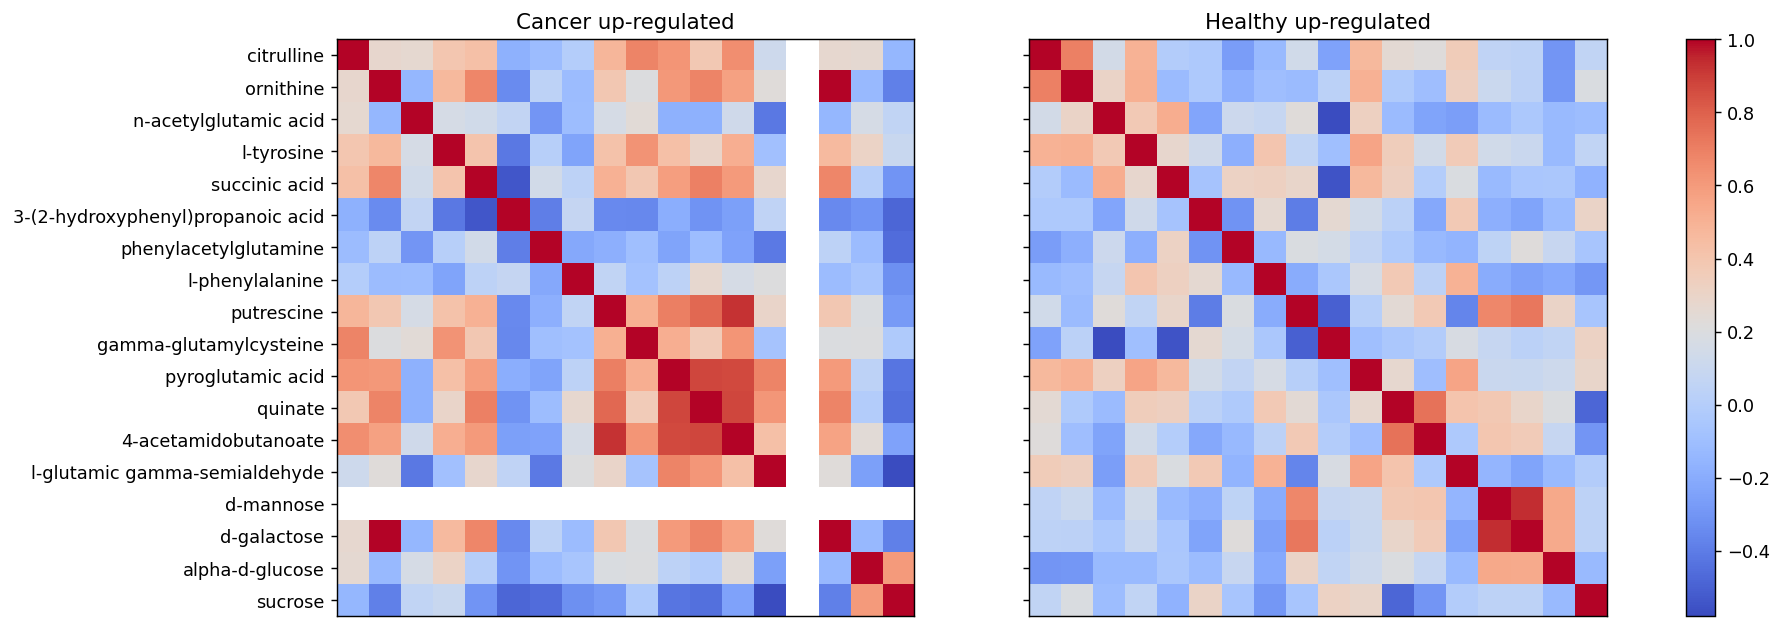

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9),  dpi=128, sharey=True)

cancer_map_up = axs[0].imshow(cancer_corr_up, cmap='coolwarm', interpolation='nearest', aspect='auto')
axs[0].set_title('Cancer up-regulated')
axs[0].set_yticks(np.arange(cancer_corr_up.shape[1]), cancer_corr_up.columns)
axs[0].set_xticks([])
axs[0].set_aspect('equal', adjustable='box')
# fig.colorbar(cancer_map, ax=axs[0], pad=0.05)

healthy_map_up = axs[1].imshow(healthy_corr_up, cmap='coolwarm', interpolation='nearest', aspect='auto')
axs[1].set_title('Healthy up-regulated')
axs[1].set_yticks(np.arange(healthy_corr_up.shape[1]), healthy_corr_up.columns)
axs[1].set_xticks([])
axs[1].set_aspect('equal', adjustable='box')

fig.colorbar(healthy_map_up, ax=axs, pad=0.05, shrink=.65)

# plt.savefig('../../assets/images/corr_heatmap_up.png', bbox_inches='tight')


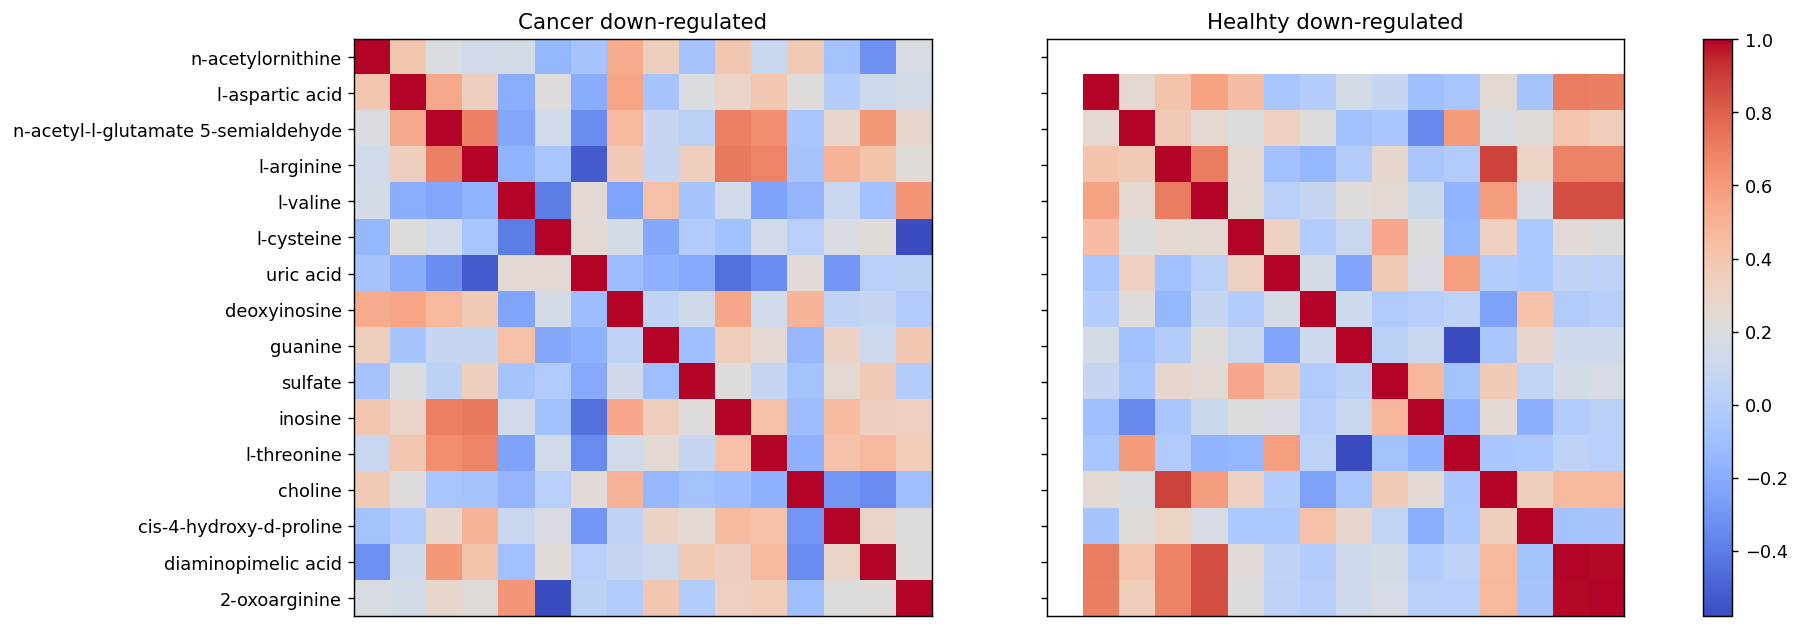

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9),  dpi=128, sharey=True)

cancer_map_down = axs[0].imshow(cancer_corr_down, cmap='coolwarm', interpolation='nearest', aspect='auto')
axs[0].set_title('Cancer down-regulated')
axs[0].set_yticks(np.arange(cancer_corr_down.shape[1]), cancer_corr_down.columns)
axs[0].set_xticks([])
axs[0].set_aspect('equal', adjustable='box')
# fig.colorbar(cancer_map, ax=axs[0], pad=0.05)

healthy_map_down = axs[1].imshow(healthy_corr_down, cmap='coolwarm', interpolation='nearest', aspect='auto')
axs[1].set_title('Healhty down-regulated')
axs[1].set_yticks(np.arange(healthy_corr_down.shape[1]), healthy_corr_down.columns)
axs[1].set_xticks([])
axs[1].set_aspect('equal', adjustable='box')

fig.colorbar(healthy_map_up, ax=axs, pad=0.05, shrink=.65)

# plt.savefig('../../assets/images/corr_heatmap_down.png', bbox_inches='tight')

Present the matrix as an "adjacency list"

In [16]:
cancer_corr_up = cancer_corr_up.where(np.triu(np.ones(cancer_corr_up.shape)).astype(bool)).stack()
cancer_corr_up.index.names = ['source', 'target']
cancer_corr_up = cancer_corr_up.reset_index()
cancer_corr_up.columns = ['source', 'target', 'correlation']

cancer_edges_up = cancer_corr_up[cancer_corr_up['source'] != cancer_corr_up['target']]

In [18]:
cancer_corr_down = cancer_corr_down.where(np.triu(np.ones(cancer_corr_down.shape)).astype(bool)).stack()
cancer_corr_down.index.names = ['source', 'target']
cancer_corr_down = cancer_corr_down.reset_index()
cancer_corr_down.columns = ['source', 'target', 'correlation']

cancer_edges_down = cancer_corr_down[cancer_corr_down['source'] != cancer_corr_down['target']]

In [19]:
healthy_corr_up = healthy_corr_up.where(np.triu(np.ones(healthy_corr_up.shape)).astype(bool)).stack()
healthy_corr_up.index.names = ['source', 'target']
healthy_corr_up = healthy_corr_up.reset_index()
healthy_corr_up.columns = ['source', 'target', 'correlation']

healthy_edges_up = healthy_corr_up[healthy_corr_up['source'] != healthy_corr_up['target']]

In [20]:
healthy_corr_down = healthy_corr_down.where(np.triu(np.ones(healthy_corr_down.shape)).astype(bool)).stack()
healthy_corr_down.index.names = ['source', 'target']
healthy_corr_down = healthy_corr_down.reset_index()
healthy_corr_down.columns = ['source', 'target', 'correlation']

healthy_edges_down = healthy_corr_down[healthy_corr_down['source'] != healthy_corr_down['target']]

In [21]:
healthy_edges = pd.merge(healthy_edges_up, healthy_edges_down,  on=['source', 'target'], suffixes=('_up', '_down'), how='outer')
cancer_edges = pd.merge(cancer_edges_up, cancer_edges_down,  on=['source', 'target'], suffixes=('_up', '_down'), how='outer')
full_edges = pd.merge(healthy_edges, cancer_edges,  on=['source', 'target'], suffixes=('_healthy', '_cancer'), how='outer')
up_edges = pd.merge(healthy_edges_up, cancer_edges_up, on=['source', 'target'], suffixes=('_healthy', '_cancer'), how='outer')
down_edges = pd.merge(healthy_edges_down, cancer_edges_down, on=['source', 'target'], suffixes=('_healthy', '_cancer'), how='outer')

In [52]:
healthy_edges_up.to_csv('../../data/processed/up/healthy_corr_edges_up.csv', index=False, sep=';')
healthy_edges_down.to_csv('../../data/processed/down/healthy_corr_edges_down.csv', index=False, sep=';')
cancer_edges_up.to_csv('../../data/processed/up/cancer_corr_edges_up.csv', index=False, sep=';')
cancer_edges_down.to_csv('../../data/processed/down/cancer_corr_edges_down.csv', index=False, sep=';')
full_edges.to_csv('../../data/processed/full_corr_edges.csv', index=False, sep=';')

In [22]:
up_edges.to_csv('../../data/processed/up/up_corr_edges.csv', index=False, sep=';')
down_edges.to_csv('../../data/processed/down/down_corr_edges.csv', index=False, sep=';')